In [1]:
import os
# running from Root directory
os.chdir("..")

In [19]:
from motif_search_main import load_network_from_args
from utils.export_import import import_results
from utils.logs import log_motif_criteria_args, log_motif_results, log_sub_graph_args, log_randomizer_args, log_motifs_table
from utils.types import MotifCriteriaArgs, MotifType, MotifName
import matplotlib.pyplot as plt
import networkx as nx
from typing import Union
import numpy as np
from collections import defaultdict
import plotly.express as px
import pandas as pd
from utils.simple_logger import Logger

logger = Logger()
logger.toggle(False)

In [72]:
dir_ = 'results/synapse_threshold_experiment/'

def plot_(df, net_experiment: str):
    fig = px.scatter(df,
                     x='m',
                     y='value',
                     color='variable',
                     labels={
                         "m": "M - synapse_threshold",
                         "value": "Z score",
                         "variable": "Motif Id"
                     },
                     hover_data=['m', 'edges', 'nodes', 'variable', 'value'],
                     title=f'Z-score as a function of M. network: {net_experiment}')
    
    fig.show()


def read_z_scores_as_func_of_m(net_experiment: str):
    df = pd.DataFrame()
    for file in os.listdir(dir_):
        if not file.startswith(net_experiment):
            continue
            
        data = import_results(f'{dir_}/{file}')
        args = data['args']
        motifs = data['motifs']

        if args.input_network_file.startswith('../'):
            args.input_network_file = "/".join(args.input_network_file.strip("/").split('/')[1:])

        network = load_network_from_args(args)
        edges = len(network.graph.edges)
        nodes = len(network.graph.nodes)
        
        row_ = {'m' : args.synapse_threshold}
        for motif_id in motifs: 
            motif = motifs[motif_id]
            title_name =  f'{motif.name.value}-{motif.id}' if motif.name.value != MotifName.na else motif.id
            row_[str(title_name)] = motif.motif_criteria.z_score
            row_['edges'] = edges
            row_['nodes'] = nodes
    
        df = pd.concat([df, pd.DataFrame.from_dict(row_, orient='index').T], ignore_index=True)

    melt_list = ['m', 'edges', 'nodes']
    cols = list(df.columns)
    cols = [c for c in cols if c not in melt_list]
    df_ = df.melt(id_vars=melt_list, value_vars=cols)
    plot_(df_, net_experiment)

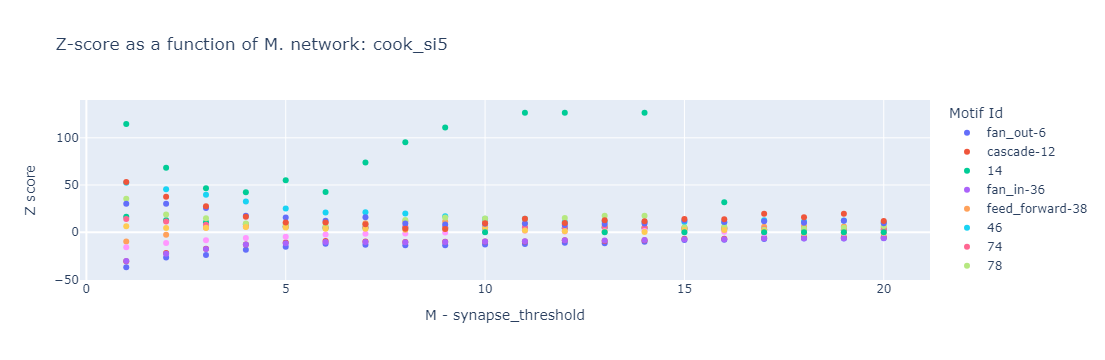

,m,edges,nodes,variable,value
0,1.0,3390.0,272.0,fan_out-6,-37.131691
1,10.0,599.0,260.0,fan_out-6,-12.914737
2,11.0,520.0,252.0,fan_out-6,-12.542857
3,12.0,465.0,242.0,fan_out-6,-11.267933
4,13.0,417.0,227.0,fan_out-6,-11.780711
...,...,...,...,...,...
255,5.0,1179.0,271.0,238,55.124031
256,6.0,993.0,269.0,238,42.591519
257,7.0,855.0,268.0,238,73.918703
258,8.0,765.0,267.0,238,95.202843


In [76]:
read_z_scores_as_func_of_m('cook_si5')

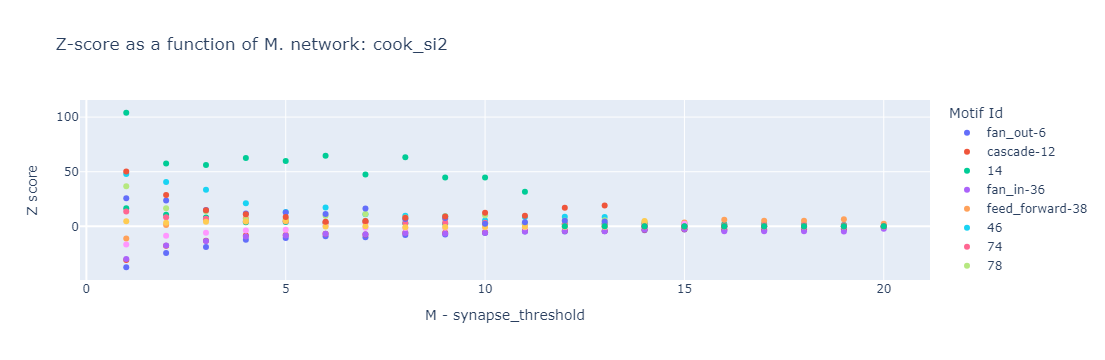

,m,edges,nodes,variable,value
0,1.0,2982.0,250.0,fan_out-6,-37.448764
1,10.0,202.0,152.0,fan_out-6,-6.058278
2,11.0,169.0,135.0,fan_out-6,-4.659356
3,12.0,138.0,117.0,fan_out-6,-4.716414
4,13.0,115.0,105.0,fan_out-6,-4.397415
...,...,...,...,...,...
255,5.0,592.0,232.0,238,59.885272
256,6.0,467.0,220.0,238,64.666554
257,7.0,371.0,211.0,238,47.465946
258,8.0,304.0,193.0,238,63.245561


In [73]:
read_z_scores_as_func_of_m('cook_si2')

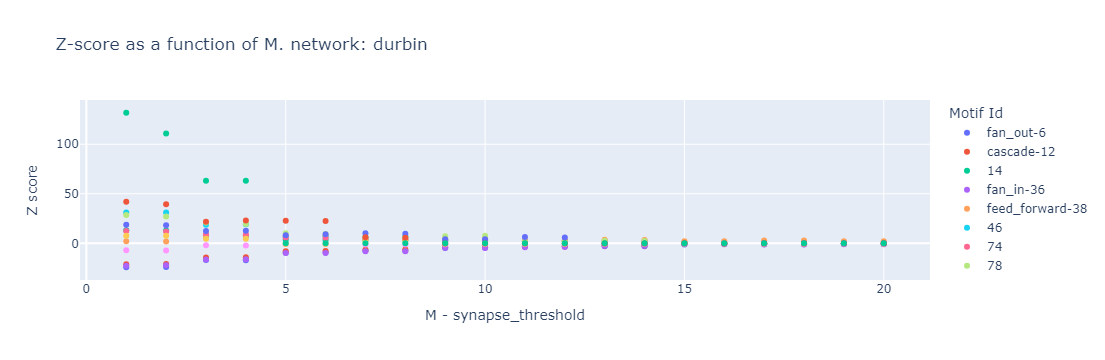

,m,edges,nodes,variable,value
0,1.0,1491.0,195.0,fan_out-6,-24.182305
1,10.0,221.0,143.0,fan_out-6,-4.546333
2,11.0,153.0,124.0,fan_out-6,-3.174078
3,12.0,151.0,122.0,fan_out-6,-3.083172
4,13.0,110.0,101.0,fan_out-6,-2.981251
...,...,...,...,...,...
255,5.0,502.0,173.0,238,-0.031639
256,6.0,497.0,173.0,238,-0.031639
257,7.0,354.0,165.0,238,0.000000
258,8.0,349.0,163.0,238,0.000000


In [74]:
read_z_scores_as_func_of_m('durbin')

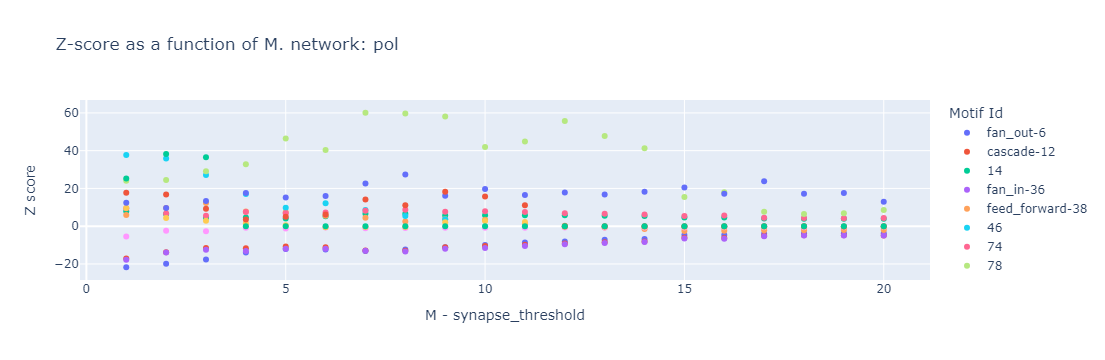

,m,edges,nodes,variable,value
0,1.0,1752.0,283.0,fan_out-6,-21.754694
1,10.0,371.0,223.0,fan_out-6,-9.968433
2,11.0,328.0,212.0,fan_out-6,-8.659000
3,12.0,294.0,202.0,fan_out-6,-8.085296
4,13.0,267.0,190.0,fan_out-6,-7.223925
...,...,...,...,...,...
255,5.0,661.0,259.0,238,0.000000
256,6.0,570.0,256.0,238,0.000000
257,7.0,496.0,249.0,238,0.000000
258,8.0,456.0,244.0,238,0.000000


In [75]:
read_z_scores_as_func_of_m('pol')